Описание проекта:
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить закономерности, определяющие успешность игры . 

Импортируем библиотеки и посмотрим на данные

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [ ]:

df.info()                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df = df.rename(columns={'Name' : 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales' : 'na_sales', 'EU_sales' : 'eu_sales', 'JP_sales' : 'jp_sales', 'Other_sales' : 'other_sales', 'Critic_Score' : 'critic_score', 'User_Score' : 'user_score', 'Rating' : 'rating'
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Я изменила тип данных в user_score на числовой, заполнила пропуски в этом столбце средними значениями по жанру игры.

Отсутствующие значения в рейтинге заполнила аббревиатурой RP - rating pending, то есть рейтинг не присвоен

In [ ]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [ ]:
df['rating'] = df['rating'].fillna('RP')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16715 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [ ]:
df['na_sum'] = df['na_sales'].sum()
df['eu_sum'] = df['eu_sales'].sum()
df['jp_sum'] = df['jp_sales'].sum()
df['other_sum'] = df['other_sales'].sum()
df['global_sum'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,na_sum,eu_sum,jp_sum,other_sum,global_sum
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,4402.35,2424.67,1297.37,791.32,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,4402.35,2424.67,1297.37,791.32,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,4402.35,2424.67,1297.37,791.32,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,4402.35,2424.67,1297.37,791.32,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,4402.35,2424.67,1297.37,791.32,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,4402.35,2424.67,1297.37,791.32,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,4402.35,2424.67,1297.37,791.32,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,4402.35,2424.67,1297.37,791.32,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,4402.35,2424.67,1297.37,791.32,0.01


Посмотрим, сколько игр выпускалось в разные годы

In [ ]:
game_grouped = df.pivot_table(values='name', index='year_of_release', aggfunc='count').reset_index()
display(game_grouped)

,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


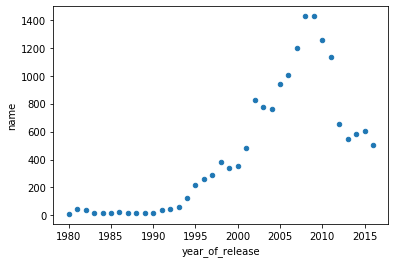

In [ ]:
ax1 = game_grouped.plot.scatter(x='year_of_release', y='name')

Я бы отбросила все, что меньше 100, то есть все периоды до 1993 года включительно

Посмотрим, сколько игр было выпущено на какой платформе

In [ ]:
platform_grouped = df.pivot_table(values='name', index='platform', aggfunc='count').reset_index()
display(platform_grouped)

,platform,name
0,2600,133
1,3DO,3
2,3DS,520
3,DC,52
4,DS,2151
5,GB,98
6,GBA,822
7,GC,556
8,GEN,27
9,GG,1


In [ ]:
display(platform_grouped.sort_values(by='name', ascending=False).head(20).reset_index()) #выберем топ-20

,index,platform,name
0,16,PS2,2161
1,4,DS,2151
2,17,PS3,1331
3,26,Wii,1320
4,28,X360,1262
5,19,PSP,1209
6,15,PS,1197
7,13,PC,974
8,29,XB,824
9,6,GBA,822


Думаю, можно выбрать первые 10

посмотрим на топ-10 и как у них шли дела

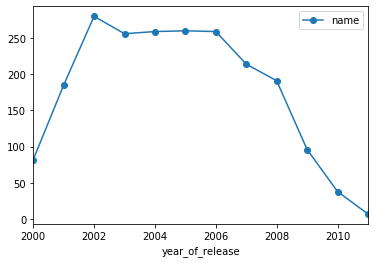

In [ ]:
ps_2 = df.query('platform == "PS2"')
ps_2_grouped = ps_2.pivot_table(values='name', index='year_of_release', aggfunc='count').reset_index()
ps_2_grouped.plot(x='year_of_release', y='name', style='o-')


In [ ]:
ds = df.query('platform == "DS"')
ds_grouped = ds.pivot_table(values='name', index='year_of_release', aggfunc='count').reset_index()

In [ ]:
ps_3 = df.query('platform == "PS3"')
ps_3_grouped = ps_3.pivot_table(values='name', index='year_of_release', aggfunc='count').reset_index()

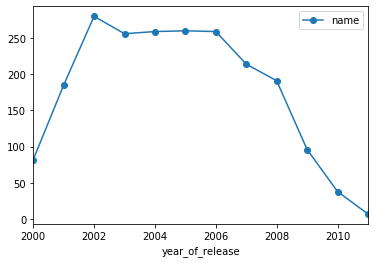

In [ ]:
ps_2_grouped.plot(x='year_of_release', y='name', style='o-') 

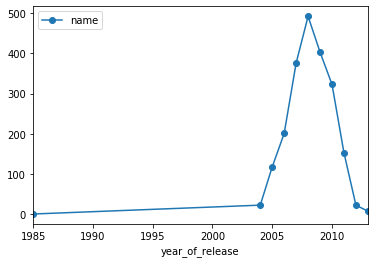

In [ ]:
ds_grouped.plot(x='year_of_release', y='name', style='o-') 

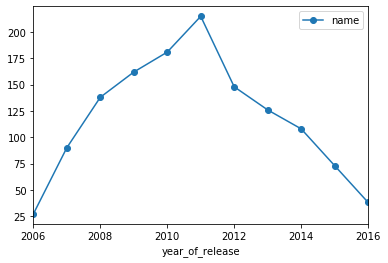

In [ ]:
ps_3_grouped.plot(x='year_of_release', y='name', style='o-') 

In [ ]:
wii = df.query('platform == "Wii"')
wii_grouped = wii.pivot_table(values='name', index='year_of_release', aggfunc='count').reset_index()

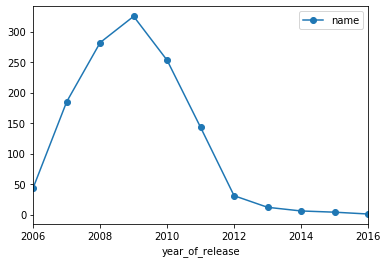

In [ ]:
wii_grouped.plot(x='year_of_release', y='name', style='o-') 

In [ ]:
x360 = df.query('platform == "X360"')
x360_grouped = x360.pivot_table(values='name', index='year_of_release', aggfunc='count').reset_index()

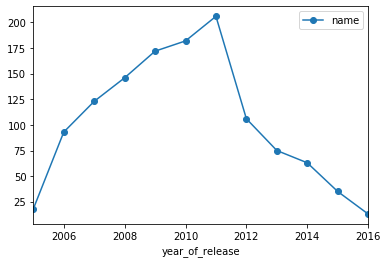

In [ ]:
x360_grouped.plot(x='year_of_release', y='name', style='o-') 

In [ ]:
psp = df.query('platform == "PSP"')
psp_grouped = psp.pivot_table(values='name', index='year_of_release', aggfunc='count').reset_index()

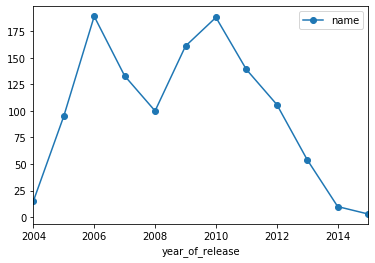

In [ ]:
psp_grouped.plot(x='year_of_release', y='name', style='o-') 

In [ ]:
ps = df.query('platform == "PS"')
ps_grouped = ps.pivot_table(values='name', index='year_of_release', aggfunc='count').reset_index()

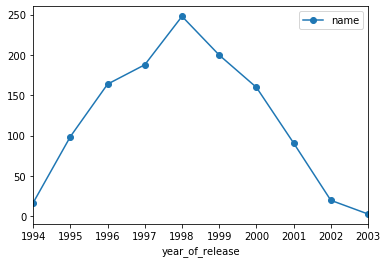

In [ ]:
ps_grouped.plot(x='year_of_release', y='name', style='o-') 

За какой характерный срок появляются новые и исчезают старые платформы?

В среднем продолжительность жизни платформы составляет 5 лет, единственное исключение - PC.

Однако судя по графикам, платформы с наибольшим количеством игр к 2016 году уже не актуальны.

Так как по условиям задачи нужно сделать прогноз на 2017 год, то выберем данные с 2014 по 2016

In [ ]:
platform_year_2016 = df.query('year_of_release == "2016"').pivot_table(values='year_of_release', index='platform', aggfunc='count').reset_index()
display(platform_year_2016.sort_values(by='year_of_release', ascending=False).reset_index()) 

,index,platform,year_of_release
0,3,PS4,164
1,8,XOne,87
2,4,PSV,85
3,1,PC,54
4,0,3DS,46
5,2,PS3,38
6,6,WiiU,14
7,7,X360,13
8,5,Wii,1


In [ ]:
platform_year_2015 = df.query('year_of_release == "2015"').pivot_table(values='year_of_release', index='platform', aggfunc='count').reset_index()
display(platform_year_2015.sort_values(by='year_of_release', ascending=False).reset_index()) 

,index,platform,year_of_release
0,3,PS4,137
1,5,PSV,110
2,0,3DS,86
3,9,XOne,80
4,2,PS3,73
5,1,PC,50
6,8,X360,35
7,7,WiiU,28
8,6,Wii,4
9,4,PSP,3


In [ ]:
platform_year_2014 = df.query('year_of_release == "2014"').pivot_table(values='year_of_release', index='platform', aggfunc='count').reset_index()
display(platform_year_2014.sort_values(by='year_of_release', ascending=False).reset_index()) 

,index,platform,year_of_release
0,2,PS3,108
1,5,PSV,100
2,0,3DS,80
3,3,PS4,75
4,8,X360,63
5,9,XOne,61
6,1,PC,47
7,7,WiiU,31
8,4,PSP,10
9,6,Wii,6


In [ ]:
platform_year_2013 = df.query('year_of_release == "2013"').pivot_table(values='year_of_release', index='platform', aggfunc='count').reset_index()
display(platform_year_2013.sort_values(by='year_of_release', ascending=False).reset_index()) 

,index,platform,year_of_release
0,3,PS3,126
1,0,3DS,91
2,9,X360,75
3,6,PSV,63
4,5,PSP,54
5,8,WiiU,42
6,2,PC,38
7,10,XOne,19
8,4,PS4,16
9,7,Wii,12


Для выявления попуолярной и прибыльной платформы я думаю взять данные за последние 3 года, то есть с 2014 по 2016 год.

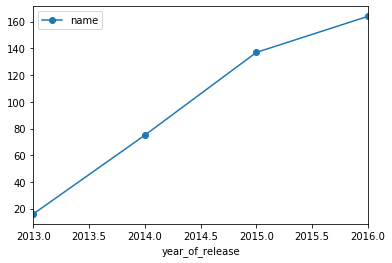

In [ ]:
ps_4 = df.query('platform == "PS4"')
ps_4_grouped = ps_4.pivot_table(values='name', index='year_of_release', aggfunc='count').reset_index()
ps_4_grouped.plot(x='year_of_release', y='name', style='o-') 

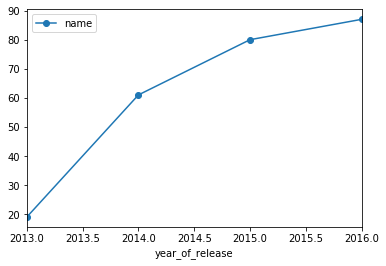

In [ ]:
xone = df.query('platform == "XOne"')
xone_grouped = xone.pivot_table(values='name', index='year_of_release', aggfunc='count').reset_index()
xone_grouped.plot(x='year_of_release', y='name', style='o-') 

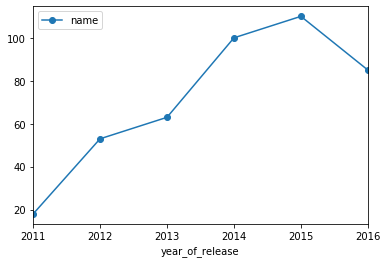

In [ ]:
psv = df.query('platform == "PSV"')
psv_grouped = psv.pivot_table(values='name', index='year_of_release', aggfunc='count').reset_index()
psv_grouped.plot(x='year_of_release', y='name', style='o-') 

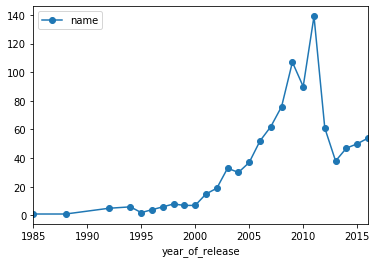

In [ ]:
pc = df.query('platform == "PC"')
pc_grouped = pc.pivot_table(values='name', index='year_of_release', aggfunc='count').reset_index()
pc_grouped.plot(x='year_of_release', y='name', style='o-')

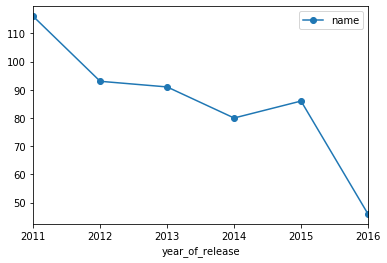

In [ ]:
ds = df.query('platform == "3DS"')
ds_grouped = ds.pivot_table(values='name', index='year_of_release', aggfunc='count').reset_index()
ds_grouped.plot(x='year_of_release', y='name', style='o-')

Как видно из графиков в среднем продолжительность жизни платформы составляет 5 лет. Выбивается только платформа PC, у которой был резкий спад в 2010-х, а дальше опять наметился подъем.

Посмотрим, какие платформы лидируют по продажам

In [ ]:
platform_sales_2014 = df.query('year_of_release == "2014"').pivot_table(values='global_sum', index='platform', aggfunc='sum').reset_index()
display(platform_sales_2014.sort_values(by='global_sum', ascending=False).reset_index()) 

,index,platform,global_sum
0,3,PS4,100.00
1,9,XOne,54.07
2,2,PS3,47.76
3,0,3DS,43.76
4,8,X360,34.74
5,7,WiiU,22.03
6,1,PC,13.28
7,5,PSV,11.90
8,6,Wii,3.75
9,4,PSP,0.24


In [ ]:
platform_sales_2015 = df.query('year_of_release == "2015"').pivot_table(values='global_sum', index='platform', aggfunc='sum').reset_index()
display(platform_sales_2015.sort_values(by='global_sum', ascending=False).reset_index()) 

,index,platform,global_sum
0,3,PS4,118.90
1,9,XOne,60.14
2,0,3DS,27.78
3,2,PS3,16.82
4,7,WiiU,16.35
5,8,X360,11.96
6,1,PC,8.52
7,5,PSV,6.25
8,6,Wii,1.14
9,4,PSP,0.12


In [ ]:
platform_sales_2016 = df.query('year_of_release == "2016"').pivot_table(values='global_sum', index='platform', aggfunc='sum').reset_index()
display(platform_sales_2016.sort_values(by='global_sum', ascending=False).reset_index()) 

,index,platform,global_sum
0,3,PS4,69.25
1,8,XOne,26.15
2,0,3DS,15.14
3,1,PC,5.25
4,6,WiiU,4.60
5,4,PSV,4.25
6,2,PS3,3.60
7,7,X360,1.52
8,5,Wii,0.18


С 2014 по 2016 год в лидерах продаж находятся PS4, Xone и 3DS.

In [ ]:
df_current = df.query('year_of_release == "2014" or year_of_release == "2015" or year_of_release == "2016"')
df_current.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 16 columns):
name               1689 non-null object
platform           1689 non-null object
year_of_release    1689 non-null float64
genre              1689 non-null object
na_sales           1689 non-null float64
eu_sales           1689 non-null float64
jp_sales           1689 non-null float64
other_sales        1689 non-null float64
critic_score       718 non-null float64
user_score         888 non-null float64
rating             1689 non-null object
na_sum             1689 non-null float64
eu_sum             1689 non-null float64
jp_sum             1689 non-null float64
other_sum          1689 non-null float64
global_sum         1689 non-null float64
dtypes: float64(12), object(4)
memory usage: 224.3+ KB


In [ ]:
platform_sales = df_current.pivot_table(values='global_sum', index='platform', aggfunc='sum').reset_index()
display(platform_sales.sort_values(by='global_sum', ascending=False).reset_index()) 

,index,platform,global_sum
0,3,PS4,288.15
1,9,XOne,140.36
2,0,3DS,86.68
3,2,PS3,68.18
4,8,X360,48.22
5,7,WiiU,42.98
6,1,PC,27.05
7,5,PSV,22.40
8,6,Wii,5.07
9,4,PSP,0.36


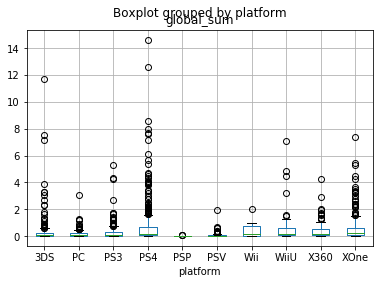

In [ ]:
df_current.boxplot(column='global_sum', by='platform')

Большинство продаж лежит в промежутке от 25 до 80, минимальное значение - 0,36, максимальное, соответственно, 288.

Посмотрим, как влияют рейтинги критиков и пользователей на продажи

In [ ]:
ps_4_current = df_current.query('platform == "PS4"')

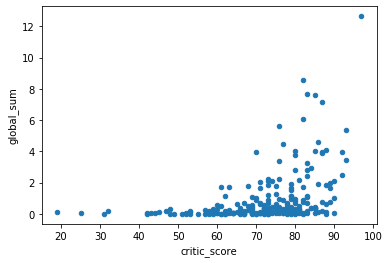

In [ ]:
ps_4_current.plot(x='critic_score', y='global_sum', kind='scatter') 

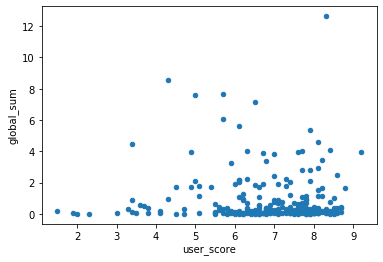

In [ ]:
ps_4_current.plot(x='user_score', y='global_sum', kind='scatter') 

In [ ]:
print(ps_4_current['global_sum'].corr(ps_4_current['critic_score']))
print(ps_4_current['global_sum'].corr(ps_4_current['user_score']))

0.40266141068104083
-0.040131589472697356


есть слабая прямая зависимость от critic_score к продажам и слабая непрямая связь user_score  к продажам

Соотнесите выводы с продажами игр на других платформах.

In [ ]:
xone_current = df_current.query('platform == "XOne"')
ds_current = df_current.query('platform == "3DS"')

In [ ]:
print(xone_current['global_sum'].corr(xone_current['critic_score']))
print(xone_current['global_sum'].corr(xone_current['user_score']))

0.42867694370333226
-0.0703839280647581


In [ ]:
print(ds_current['global_sum'].corr(ds_current['critic_score']))
print(ds_current['global_sum'].corr(ds_current['user_score']))

0.31411749286905105
0.2151932718527028


есть слабая прямая зависимость от critic_score к продажам и слабая непрямая связь user_score к продажам на платформе Xone, 

на платформе3ds обе связи слабые и прямые

Посмотрим на самые прибыльные жанры

In [ ]:
df_genre = df_current.pivot_table(values='global_sum', index='genre', aggfunc='sum').reset_index()
display(df_genre.sort_values(by='global_sum', ascending=False).reset_index()) 

,index,genre,global_sum
0,0,Action,199.36
1,8,Shooter,170.94
2,10,Sports,109.48
3,7,Role-Playing,101.44
4,3,Misc,37.55
5,2,Fighting,28.22
6,6,Racing,27.52
7,4,Platform,18.09
8,1,Adventure,17.55
9,9,Simulation,13.13


по продажам сильно выделяются 4 жанра: action, shooter, sports, role-playing; паззлы и стратегии в самом низу

Составим портрет пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5);
Самые популярные жанры (топ-5).


In [ ]:
na_games = df_current.pivot_table(index='platform', values='na_sales', aggfunc=sum)
na_games.sort_values('na_sales', ascending=False).head()


,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


Самые популярные платформы в Северной Америке: PS4, XOne, X360, 3DS, PS3

In [ ]:
eu_games = df_current.pivot_table(index='platform', values='eu_sales', aggfunc=sum)
eu_games.sort_values('eu_sales', ascending=False).head()


,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


Самые популярные платформы в Европе: PS4, XOne, PS3, PC, 3DS

In [ ]:
jp_games = df_current.pivot_table(index='platform', values='jp_sales', aggfunc=sum)
jp_games.sort_values('jp_sales', ascending=False).head()


,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


Самые популярные платформы в Японии: 3DS, PS4, PSV, PS3, WiiU

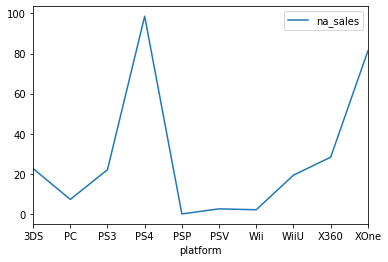

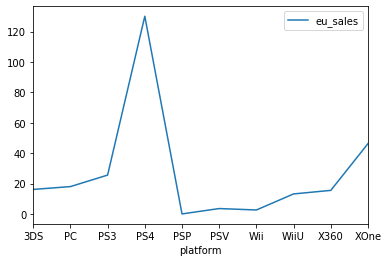

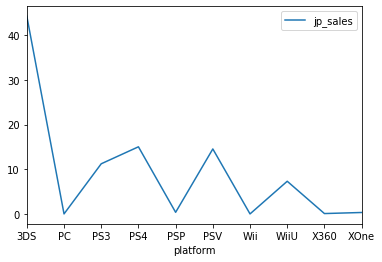

In [ ]:
na_games.plot()
eu_games.plot()
jp_games.plot()

In [ ]:
na_games_genre = df_current.pivot_table(index='genre', values='na_sales', aggfunc=sum)
na_games_genre.sort_values('na_sales', ascending=False).head()

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


Самые популярные жанры в Северной Америке: шутер, экшн, спорт, ролевые игры, разное

In [ ]:
eu_games_genre = df_current.pivot_table(index='genre', values='eu_sales', aggfunc=sum)
eu_games_genre.sort_values('eu_sales', ascending=False).head()

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


Самые популярные жанры в Европе: экшн, шутер, спорт, ролевые, гонки

In [ ]:
jp_games_genre = df_current.pivot_table(index='genre', values='jp_sales', aggfunc=sum)
jp_games_genre.sort_values('jp_sales', ascending=False).head()

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


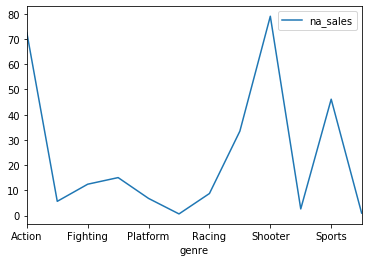

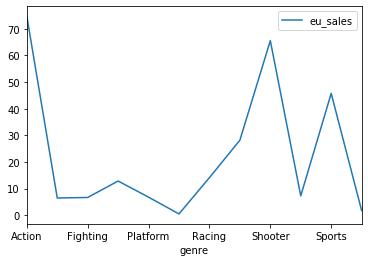

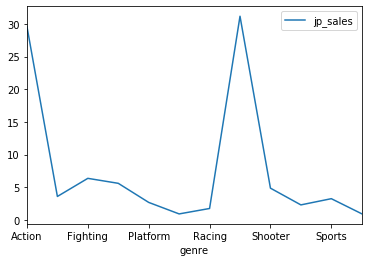

In [ ]:
na_games_genre.plot()
eu_games_genre.plot()
jp_games_genre.plot()

Самые популярные жанры в Японии: ролевые, экшн, файтинг, разное, шутер.

Файтинг вошел в топ-5 только Японии, гонки - в топ-5 только в Европе

In [ ]:
na_rating = df_current.pivot_table(index='rating', values='na_sales', aggfunc=sum)
na_rating.sort_values('na_sales', ascending=False).head()

,na_sales
rating,
M,96.42
RP,64.72
E,50.74
T,38.95
E10+,33.23


На первом месте в Североной Америке игры с рейтингом М - для взрослых.

In [ ]:
eu_rating = df_current.pivot_table(index='rating', values='eu_sales', aggfunc=sum)
eu_rating.sort_values('eu_sales', ascending=False).head()

,eu_sales
rating,
M,93.44
RP,58.95
E,58.06
T,34.07
E10+,26.16


На первом месте в Европе игры с рейтингом М - для взрослых.

In [ ]:
jp_rating = df_current.pivot_table(index='rating', values='jp_sales', aggfunc=sum)
jp_rating.sort_values('jp_sales', ascending=False).head()

,jp_sales
rating,
RP,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


В Японии на первом месте игры без рейтинга, с существенным отрывом. 

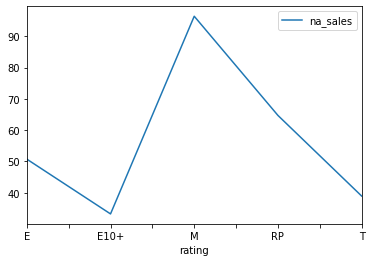

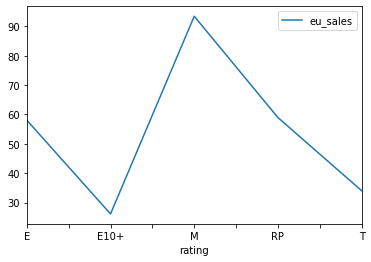

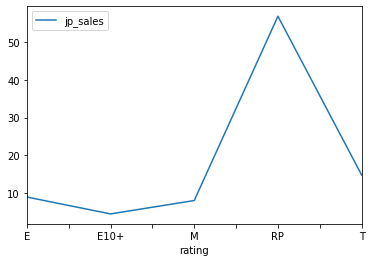

In [ ]:
na_rating.plot()
eu_rating.plot()
jp_rating.plot()

<div class="alert alert-info"> в Японии рейтингом игр занимается другая организация (CERO), соответственно, если игра выпущена в Японии, то и рейтинг ей будет присвоен не ESRB
</div>

Нулевая гипотеза формулируется так, чтобы использовать знак равенства.
Зададим пороговое значение альфа 0.05.



<div class="alert alert-info">Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
</div>

In [ ]:
df_current = df_current.dropna(subset=['user_score' ]) #удаляем строки с пропусками в user_score

In [ ]:
alpha = .05 
sample_1 = df_current.query('platform == "XOne"')['user_score']
sample_2 =df_current.query('platform == "PC"')['user_score']
results = st.ttest_ind(
    sample_1, 
    sample_2)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">
Вывод: Средние пользовательские рейтинги жанров Action и Sports одинаковые.</div>

<div class="alert alert-info">Средние пользовательские рейтинги жанров Action и Sports одинаковые.
</div>

In [ ]:
alpha = .05 
sample_1 = df_current.query('genre == "Action"')['user_score']
sample_2 =df_current.query('genre == "Sports"')['user_score']
results = st.ttest_ind(
    sample_1, 
    sample_2)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.8711147985105864e-19
Отвергаем нулевую гипотезу


<div class="alert alert-info"> Вывод: Средние пользовательские рейтинги жанров Action и Sports отличаются.
</div>

Вывод:
1) игровые платформы очень быстро (в среднем 5 лет) появляются и исчезают

2) только PC держится примерно на одном уровне с небольшими скачками

3) платформы с самым большим количеством выпущенных игр к 2016 года уже потеряли свою актуальность

4) были выбрано наиболее прибыльные платформы с 2014 под 2016 год, к которым отнесены PS4, Xbox One, 3DS

5) пользователи в разных регионах мира (Северная Америка, Европа, Япония) выбирают те же самые жанры игр с очень небольшим отличем (в Европе в топ-5 вошли гонки, в Японии в топ-5 вошли бои)

6) рейтинг влияет на продажи очень опосредованно: в Северной Америке и в Европе по продажам лидируют игры с рейтингом М - для взрослых, однако это может лишь означать, что самое большое количество покупателей составялют взрослые люди

7) самые популярные платформы: PS4, PS3, 3DS - эти платформы вошли в топ-5 всех регионов.

Я бы рекомендовала компании делать ставку на самые популярные платформы, а также на игры для PC, так как PC выглядит достаточно стабильно на фоне постоянно появляющихся и исчезающих платформ.
